In [10]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Свойства оценок

__1) Несмещенность__

Оценка называется несмещенной, если ее мат ожидание равно оцениваему парметру 
$$
E(\hat \theta) = \theta
$$

Смещение это разница $bias(\hat \theta ) = E(\hat \theta) - \theta$

**Значит**: Если мы при фиксированном $n$ постоянно спользуем какую-то формулу, чтобы получить оценку, то В СРЕДНЕМ МЫ НЕ ОШИБАЕМСЯ

**Как проверить**: найти $\hat \theta$ и сравнить с $\theta$

__2)Состоятельность__

Оценка называется состоятельной, если она сходится по вероятности к истинному значению параметра при $ n \rightarrow \infty$
$$
\hat \theta \overset{p}{\rightarrow} \theta
$$
**Значит**:Чем больше наблюдений, тем мы ближе наша оценка сходится к истиному значению параметра (реальной оценке)

**Как проверить**: 
 - используя ЗБЧ найти к чему сходится оценка
 - использовать условие Чебышева:
    Если оценка несмещенная и ее дисперсия при росте $n$ стремиться к $0$ $ \Rightarrow $ она состоятельная 
    $$
    E(\overline{x}) = \mu $$ 
    $$ Var(\overline{x}) = \frac{\sigma^2}{n} \overset{n \rightarrow \infty}{\rightarrow} 0  $$
    

__3) Асимптотическая несмещенность__

Оценка называется асимптотически несмещенной, если ее мат ожидание сходится к оцениваему парметру при $ n \rightarrow \infty$
$$
E(\hat \theta) \rightarrow \theta
$$

>Если мы постоянно используем нашу оценку (estimator), в среднем при большим $n$, мы не будем ошибаться

# Сравнение оценок

Несмещенных и состоятельных оценок может оказаться несколько $\Rightarrow$ нужно научиться их сравнивать
- при помощи средней квадратичной ошибки (Mean Squared Error)
    $$
    MSE = E(\hat \theta - \theta)^2 = Var(\hat \theta) + Bias(\hat \theta)^2
    $$
    Если $\theta$ несмещенная, то $MSE = Var(\hat \theta)$

Поиск компромиса между смещением и разбросом позволяет уменьшить MSE, этим часто пользуются в машинном обучении (резуляризация). 

Регуляризация(штраф) дает 
 - смещенную оценку прогноза, но позволяет минимизировать MSE
 - если ее не использовать дает несмещенное значение прогноза, но большое MSE (чем это плохо: широкие доверительные интревалы )

 __4) Эффективность__

 Эфективность означает наименьшую дисперсию, что влечет узкие доверительные интервылы  - а это очень хорошо.
 При поиске эффективной оценки можно зафиксировать bias и найти оценку с наименьшей дисперсией. Такая оценка будет эффективной в классе со смещением **$Bias(\hat \theta)$**

 - Нас всегда интересуют эффективные несмещенные оценки!!!
 - В классе всех возможных наилучшей в смысле MSE оценки не существует 

На рисунке ниже у оценок одинаковое смещение (класс), но при этом у оценки 1 дисперсия меньше. Так как у оценки 1 самая маленькая дисперсия $ \Rightarrow$ она для нас самая предпочтительная 

In [38]:
def graf(new_data1, new_data2,  title, **kwargs):
    '''
    Функция, которая возвращает 2 гистограммы гистограммы и нанесенные на русунок значение thetа.
    \tА так же отличное от thetа показатель матожидание(thetа)
    
    Аргументы
     - new_data1,new_data2 - массивы цифр
     - title - название графика

    '''

    mu = np.mean(new_data1)

    graph  = sns.kdeplot( new_data1, label = r'Оценка 1', **kwargs)
    graph = sns.kdeplot(new_data2 , label = r'Оценка 2', **kwargs)
    # true theta
    graph.axvline(10, color = 'black', ls='--', linewidth=2, label = r'$\theta$')
    # hat theta
    graph.axvline(mu, color = 'green', ls='--', linewidth=1, label = r'$E(\hat \theta)$')
    graph.legend()
    graph.set_title(title)
    

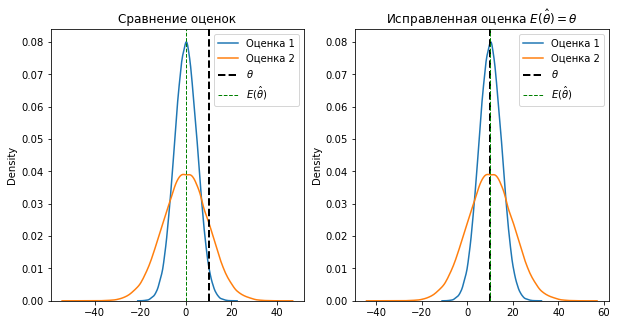

In [45]:
norm_rv1, norm_rv2 = stats.norm(loc=0, scale=5) , stats.norm(loc=0, scale=10)

data1, data2 = norm_rv1.rvs(10**5), norm_rv2.rvs(10**5)
# добавим биас к каждой (+10) к каждому значению data1
new_data1 = [i + 10 for i in data1]
new_data2 = [i + 10 for i in data2]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

graf(data1, data2, ax=ax[0], title = 'Сравнение оценок')
graf(new_data1, new_data2, ax=ax[1], title = r'Исправленная оценка $E(\hat \theta) = \theta$')


**Как проверить эффективность**
Для функции потерь $MSE$ существует теоретическая нижняя граница, ее называют неравенство Рао-Фреше_Крамера

Если оценка параметра несмещена и выполнены условия регулярности:

1. Область определения случайной величины не зависитот параметра θ (нормальное распредление выполняется, равномерное - нет)
2. Сложное техническое условие, разрешающее брать производные (обычно формулируется по-разному)
3. Существует конечная положительная информация Фишера
$
J(\theta) = E(\frac{\partial lnf(x, \theta)}{\partial \theta})^2
$
$f(x, \theta)$ - плотность распределения

Тогда для дисперсии оценки выполняется неравенство Рао-Фреше_Крамера
$$Var(\theta) \geq \frac{1}{nJ(\theta)}$$

Если $Var(\theta) = \frac{1}{nJ(\theta)} \Rightarrow $ тогда оценка эффективна

Если оценка смещенная, то 
$
Var(\theta) \geq \frac{(1+bias_{\theta}^{'})^2}{nJ(\theta)}
$

Доверительный интервал - это случайный интервал, построенный по выборке (верхняя и нижняя границы этого интервала должны быть статистиками), который содержит (накрывает) истинное значение параметра с вероятностью, не меньшей заданного значения.

In [12]:
# решение одного из заданий (2)
from scipy import stats
import numpy as np
uniform_rv = stats.uniform(0, 1)
x = uniform_rv.rvs(size = (5, 1000))
round(np.mean(x, axis=0).var(), 3)

0.017